In [3]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
"""
    Downscale an image to a target resolution (below max_res), keeping aspect ratio.
    Returns the low-res and low-bitrate image image.
"""
def degrade_image(img, max_res=100, jpeg_quality=20):
    h, w = img.shape[:2]
    aspect_ratio = w/h

    if w > h:
        new_w = max_res
        new_h = int(new_w / aspect_ratio)
    else:
        new_h = max_res
        new_w = int(new_h * aspect_ratio)

    low_res = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), jpeg_quality]
    result, encimg = cv2.imencode('.jpg', low_res, encode_param)
    if result:
        low_res = cv2.imdecode(encimg, 1)
    
    return low_res

In [600]:
img = cv2.imread("data/normal/2.jpg")
low_res_img = degrade_image(img, max_res=55, jpeg_quality=80)

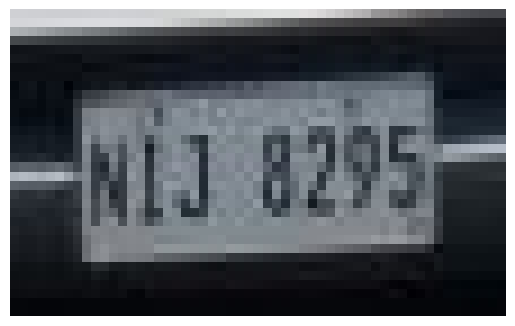

In [563]:
plt.imshow(cv2.cvtColor(low_res_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [7]:
out_dir = os.path.join('data', 'REAL-ESRGAN', 'realesrgan-lowreso')
in_dir = os.path.join('data', 'REAL-ESRGAN', 'realesrgan-cropped')
files = os.listdir(in_dir)

min_rs = 40
max_rs = 70
min_qual = 20
max_qual = 60

In [9]:
for image_name in files:
    img = cv2.imread(os.path.join(in_dir, image_name))
    res = random.randint(min_rs, max_rs)
    qual = random.randint(min_qual, max_qual)
    print(res, qual)

    low_res_img = degrade_image(img, max_res=res, jpeg_quality=qual)

    filename = f'{out_dir}/{image_name}'
    cv2.imwrite(filename, low_res_img)
    print(f'Saved low quality plate: {filename}')
    
    #plt.imshow(cv2.cvtColor(low_res_img, cv2.COLOR_BGR2RGB))
    #plt.axis('off')
    #plt.show()

59 56
Saved low quality plate: data\REAL-ESRGAN\realesrgan-lowreso/1.jpg
41 40
Saved low quality plate: data\REAL-ESRGAN\realesrgan-lowreso/10.jpg
42 45
Saved low quality plate: data\REAL-ESRGAN\realesrgan-lowreso/100.jpg
60 30
Saved low quality plate: data\REAL-ESRGAN\realesrgan-lowreso/101.jpg
68 41
Saved low quality plate: data\REAL-ESRGAN\realesrgan-lowreso/102.jpg
49 28
Saved low quality plate: data\REAL-ESRGAN\realesrgan-lowreso/103.jpg
51 32
Saved low quality plate: data\REAL-ESRGAN\realesrgan-lowreso/104.jpg
49 57
Saved low quality plate: data\REAL-ESRGAN\realesrgan-lowreso/105.jpg
55 38
Saved low quality plate: data\REAL-ESRGAN\realesrgan-lowreso/106.jpg
68 32
Saved low quality plate: data\REAL-ESRGAN\realesrgan-lowreso/107.jpg
66 57
Saved low quality plate: data\REAL-ESRGAN\realesrgan-lowreso/108.jpg
55 20
Saved low quality plate: data\REAL-ESRGAN\realesrgan-lowreso/109.jpg
48 42
Saved low quality plate: data\REAL-ESRGAN\realesrgan-lowreso/11.jpg
50 56
Saved low quality plate